# User Profile Prediction 
**Machine Learning with Python Group Project:
predict user gender and age according to the browse history**

### **1. Data Preprocessing**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv('./train.csv')
data.head() 

,ID,keywords,age,sex
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F
1,2,restaurant:1;marrakech.shtml:1,35,M
2,3,payer:1;faq:1;taxe:1;habitation:1;macron:1;qui...,45,F
3,4,rigaud:3;laurent:3;photo:11;profile:8;photopro...,46,F
4,5,societe:1;disparition:1;proche:1;m%c3%a9lanie....,42,F


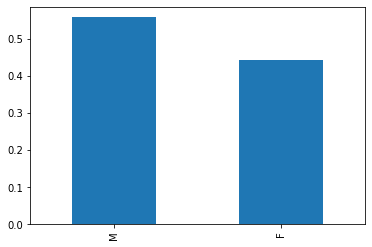

In [2]:
# check data distribution
df = data.copy()
df.sex.value_counts(normalize=True).plot(kind='bar') 
plt.show()

In [3]:
# check the missing value
data.isnull().sum()

ID               0
keywords    846396
age              0
sex              0
dtype: int64

In [4]:
# drop the missing value
data = data.dropna()
data = data.reset_index(drop=True)
data.shape

(6418659, 4)

In [5]:
# count the length of keywords
data['nbr_words'] = data['keywords'].apply(lambda x : x.count(";"))
data.head()

,ID,keywords,age,sex,nbr_words
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F,57
1,2,restaurant:1;marrakech.shtml:1,35,M,1
2,3,payer:1;faq:1;taxe:1;habitation:1;macron:1;qui...,45,F,7
3,4,rigaud:3;laurent:3;photo:11;profile:8;photopro...,46,F,17
4,5,societe:1;disparition:1;proche:1;m%c3%a9lanie....,42,F,18


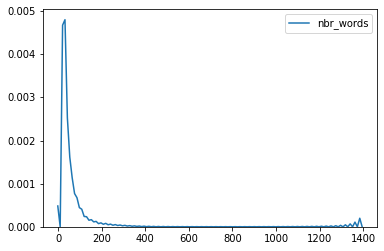

In [6]:
sns.kdeplot(data.nbr_words)
plt.show()

In [7]:
# from the density plot, we decide to drop the nbr_words lower than 50
droprows = data[data['nbr_words'] < 50].index
data = data.drop(droprows).reset_index(drop = True)
data.shape

(472601, 5)

In [8]:
# considering the computing power, we only slice the first 20000 rows data
data = data.iloc[:10000,:]
data.shape

(10000, 5)

In [9]:
def listToDict(lst):
    '''
    convert a list to dictionary
    e.g. 'restaurant:1;marrakech.shtml:1' --> {'restaurant:1, marrakech.shtml:1}
    
    '''
    op = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}

    return op

def real_sent(input_dict):
    '''
    combine the word with frequency to one element 
    '''
    sent = ''
    for word in input_dict:
        sent = sent + (word +' ') * input_dict[word]
    return sent

def token(data):
    '''
    from word with frequency to a complete piece 
    e.g. 'restaurant:1;marrakech.shtml:1' --> restaurant marrakech.shtml
    '''

    target = []
    for element in data:
        # split the word frequency 
        element = element.replace(';', ':')
        element = element.split(':')
        
        # skip the Indexerror 
        try:
            the_dict = listToDict(element)
        except IndexError:
            pass
        
        # final data
        for key in the_dict:
            the_dict[key] = int(the_dict[key])
        target.append(real_sent(the_dict))

    
    return target

In [10]:
# test piece of data to have a look
test = ['fibre:16;quoi:1;dangers:1;combien:1;hightech:16;que:16;est:1;recevra:1;operateur:1;quelles:1;installation:1;monde:1;tout:1;oblige:1;differences:1;existe:1;adsl:1;choisir:1;concerne:1;sante:1;telephonique:1;com:1;chez:1;faire:1;quelle:1;debit:1;les:2;cable:1;quels:2;fttb:1;box:1;ligne:1;pour:3;sur:16;pose:16;devient:1;meilleur:1;fttla:1;suis:3;des:1;linternaute:1;coute:1;avec:1;ftth:1;avoir:1;qui:2;avant:1;effectue:1;libre:1;debits:1;celui:1;delais:1;internet:16;abonner:1;questions:16;toujours:1;sont:2;mon:1',
        'restaurant:1;marrakech.shtml:1','payer:1;faq:1;taxe:1;habitation:1;macron:1;qui:1;detail:1;programme:1']
token(test)

['fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre fibre quoi dangers combien hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech hightech que que que que que que que que que que que que que que que que est recevra operateur quelles installation monde tout oblige differences existe adsl choisir concerne sante telephonique com chez faire quelle debit les les cable quels quels fttb box ligne pour pour pour sur sur sur sur sur sur sur sur sur sur sur sur sur sur sur sur pose pose pose pose pose pose pose pose pose pose pose pose pose pose pose pose devient meilleur fttla suis suis suis des linternaute coute avec ftth avoir qui qui avant effectue libre debits celui delais internet internet internet internet internet internet internet internet internet internet internet internet internet internet internet internet abonner questions questions questions questions questio

In [11]:
tokens = token(data.keywords)
data['text'] = pd.DataFrame(tokens)
data.head()

,ID,keywords,age,sex,nbr_words,text
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F,57,fibre fibre fibre fibre fibre fibre fibre fibr...
1,24,tabac:1;les:1;terrorisme:1;excuses:2;luxe:2;do...,40,M,68,tabac les terrorisme excuses excuses luxe luxe...
2,28,lively:1;messi:1;enzo:1;nolwenn:1;diaz:1;kourt...,50,F,111,lively messi enzo nolwenn diaz kourtney beckha...
3,33,adams:1;refaeli:1;paltrow:1;brodier:2;ariane:2...,52,F,230,adams refaeli paltrow brodier brodier ariane a...
4,42,service:1;siege:1;avenue:1;douleur+a+la+poitri...,62,F,155,service siege avenue douleur+a+la+poitrine+cot...


In [12]:
from cltk.stop.french.stops import STOPS_LIST as FRENCH_STOPS
from nltk.corpus import stopwords
stop_words = stopwords.words('french') + stopwords.words('english')

# remove stop words
from cltk.tokenize.word import WordTokenizer
data.text = data.text.astype('str')
data.text = data.text.str.lower()
data['text_clean'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [13]:
# remove symbols
import regex as re 

# y = pd.DataFrame(['shtml restaurant m%c3',' 444 marak 0ab','an'], columns=['col'])
# y.str.re.sub(r'\w*enc\w*', '', y)
# result: ['restaurant',' marak ','an']

def clean_symbol(data,col): 
    data[col] = data[col].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    data[col] = data[col].apply(lambda x:re.sub(r'\w*html\w*', '', x) )
    data[col] = data[col].apply(lambda x:re.sub(r'\w*%\w*', '', x) )
    data[col] = data[col].apply(lambda x:re.sub(r'\w*[0-9]\w*', '', x) )
#     data[col] = data[col].str.lower()
    return data

data = clean_symbol(data, "text_clean")
data.head(10)

,ID,keywords,age,sex,nbr_words,text,text_clean
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F,57,fibre fibre fibre fibre fibre fibre fibre fibr...,fibre fibre fibre fibre fibre fibre fibre fibr...
1,24,tabac:1;les:1;terrorisme:1;excuses:2;luxe:2;do...,40,M,68,tabac les terrorisme excuses excuses luxe luxe...,tabac terrorisme excuses excuses luxe luxe dol...
2,28,lively:1;messi:1;enzo:1;nolwenn:1;diaz:1;kourt...,50,F,111,lively messi enzo nolwenn diaz kourtney beckha...,lively messi enzo nolwenn diaz kourtney beckha...
3,33,adams:1;refaeli:1;paltrow:1;brodier:2;ariane:2...,52,F,230,adams refaeli paltrow brodier brodier ariane a...,adams refaeli paltrow brodier brodier ariane a...
4,42,service:1;siege:1;avenue:1;douleur+a+la+poitri...,62,F,155,service siege avenue douleur+a+la+poitrine+cot...,service siege avenue douleur a la poitrine cot...
5,46,lourdes:13;qui:13;pratique:13;trinitaine:2;pie...,74,F,79,lourdes lourdes lourdes lourdes lourdes lourde...,lourdes lourdes lourdes lourdes lourdes lourde...
6,58,sociaux:2;son:1;chateauneuf:1;petite:1;chasse:...,35,F,103,sociaux sociaux son chateauneuf petite chasse ...,sociaux sociaux chateauneuf petite chasse chim...
7,67,melania:1;kunakey:2;anderson:1;people:95;salue...,64,F,169,melania kunakey kunakey anderson people people...,melania kunakey kunakey anderson people people...
8,74,folle:1;actu:2;celebrites:9;par:1;actualites:3...,47,M,69,folle actu actu celebrites celebrites celebrit...,folle actu actu celebrites celebrites celebrit...
9,75,faute:1;expressions:1;les:2;bougival_09378fe2:...,54,M,76,faute expressions les les bougival_09378fe2 tr...,faute expressions travail actualite kev pisci...


In [14]:
from nltk.tokenize import RegexpTokenizer

# tokenize
tokenizer = RegexpTokenizer(r'\w+')
data['token'] = data.text_clean.apply(tokenizer.tokenize)
data.head()

,ID,keywords,age,sex,nbr_words,text,text_clean,token
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F,57,fibre fibre fibre fibre fibre fibre fibre fibr...,fibre fibre fibre fibre fibre fibre fibre fibr...,"[fibre, fibre, fibre, fibre, fibre, fibre, fib..."
1,24,tabac:1;les:1;terrorisme:1;excuses:2;luxe:2;do...,40,M,68,tabac les terrorisme excuses excuses luxe luxe...,tabac terrorisme excuses excuses luxe luxe dol...,"[tabac, terrorisme, excuses, excuses, luxe, lu..."
2,28,lively:1;messi:1;enzo:1;nolwenn:1;diaz:1;kourt...,50,F,111,lively messi enzo nolwenn diaz kourtney beckha...,lively messi enzo nolwenn diaz kourtney beckha...,"[lively, messi, enzo, nolwenn, diaz, kourtney,..."
3,33,adams:1;refaeli:1;paltrow:1;brodier:2;ariane:2...,52,F,230,adams refaeli paltrow brodier brodier ariane a...,adams refaeli paltrow brodier brodier ariane a...,"[adams, refaeli, paltrow, brodier, brodier, ar..."
4,42,service:1;siege:1;avenue:1;douleur+a+la+poitri...,62,F,155,service siege avenue douleur+a+la+poitrine+cot...,service siege avenue douleur a la poitrine cot...,"[service, siege, avenue, douleur, a, la, poitr..."


In [15]:
# token check 

all_words = [word for tokens in data["token"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

2951033 words total, with a vocabulary size of 32248
Max sentence length is 6871


---
### **2. Gender Prediction**


In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

def tokenize(text):
    
    # Tokenize words
    tokens = word_tokenize(text)  
    # instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    # instantiate stemmer
    stemmer = PorterStemmer()  
    #french stemmer 
    fr = SnowballStemmer('french')
    
    clean_tokens = []
    for tok in tokens:
        
        # lemmtize token using noun as part of speech
        clean_tok = lemmatizer.lemmatize(tok)
        # lemmtize token using verb as part of speech
        clean_tok = lemmatizer.lemmatize(clean_tok, pos='v') #lclean_tok = lemmatizer.lemmatize(clean_tok, pos='v')
        # stem token
        clean_tok = stemmer.stem(clean_tok)
        
        # strip whitespace and append clean token to array
        clean_tokens.append(clean_tok.strip())
        
    return clean_tokens

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

data.text = data.text.astype('str')
data.sex = data.sex.replace({'F':1, 'M':0})

def cv(data):
#     count_vectorizer = CountVectorizer(max_features=5000)
    count_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.01)
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = data.text_clean.tolist()
list_labels = data[["sex", "age"]]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=0)
X_train_counts, count_vectorizer = cv(X_train)

cv_test = TfidfVectorizer(vocabulary = count_vectorizer.vocabulary_)
cv_test_fit = cv_test.fit(X_test)
X_test_counts = cv_test.transform(X_test)

In [18]:
X_train_counts

<8000x1412 sparse matrix of type '<class 'numpy.float64'>'
	with 618658 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_counts.toarray(), y_train['sex'])

y_predicted_counts = clf.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test['sex'], y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.719, precision = 0.721, recall = 0.719, f1 = 0.719


In [21]:
from sklearn.svm import SVC
clf3 = SVC(kernel='linear', C=0.5)
clf.fit(X_train_counts.toarray(), y_train['sex'])
y_predicted_counts = clf.predict(X_test_counts.toarray())

accuracy, precision, recall, f1 = get_metrics(y_test['sex'], y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.719, precision = 0.721, recall = 0.719, f1 = 0.719


In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train_counts.toarray(), y_train['sex'])

y_predicted_counts = clf.predict(X_test_counts.toarray())

accuracy, precision, recall, f1 = get_metrics(y_test['sex'], y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.713, precision = 0.716, recall = 0.713, f1 = 0.714


In [23]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_counts.toarray(), y_train['sex'])

y_predicted_counts = clf.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test['sex'], y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.742, precision = 0.750, recall = 0.742, f1 = 0.742


In [24]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)
importance

{0: {'tops': [(-3.811820319483062, 'star'),
   (-3.793213852581494, 'week'),
   (-3.7914952530925206, 'magazin'),
   (-3.791263755823546, 'end'),
   (-3.619744713379058, 'mireil'),
   (-3.619244574164501, 'darc'),
   (-3.5959674028156785, 'obsequ'),
   (-3.4623355574930095, 'photo'),
   (-3.343538236025286, 'even'),
   (-3.029301879643837, 'peopl')],
  'bottom': [(-9.492652494573004, 'gte'),
   (-9.504381339781114, 'jess'),
   (-9.517971889111447, 'tourer'),
   (-9.518487300930879, 'countri'),
   (-9.54550400366509, 'rond'),
   (-9.574750278196131, 'hyundai'),
   (-9.581704488378547, 'kona'),
   (-9.581860353399872, 'vitre'),
   (-9.601543390249109, 'gsi'),
   (-9.606879450342374, 'grandland')]}}

In [25]:
from sklearn.ensemble import VotingClassifier

estimators = [('nb',MultinomialNB()), ('lr', LogisticRegression()), ('svm',SVC(kernel='linear', C=0.5, probability=True))]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train_counts, y_train['sex'])
voting_clf.score(X_test_counts, y_test['sex'])

0.738

### **3. Age Prediction**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


gbdt = GradientBoostingRegressor()
gbdt.fit(X_train_counts, y_train['age'].tolist())
y_pred_age = gbdt.predict(X_test_counts)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_age,y_test['age'])
mse

153.27666685868485